------------

**Máster Universitario en Ciencia de Datos**

**Curso: 2018-2019**

**Asignatura: Asignatura: M1968 - Ciclo de vida de los datos**

**Alumnos: Miguel Carlos Blanco Cacharrón, Razvan Pascal**

**Fecha: 21-01-2019**

------------

# Workflow

En esta práctica vamos a aplicar lo aprendido en esta asignatura para crear un flujo que automatice la descarga, análisis y publicación de los datos utilizando distintas herramientas como Zenodo, github y librerías de python para el análisis de datos

### Librerías necesarias para la práctica

```python
import xml.etree.ElementTree as ET
import requests
import json
import zipfile
```

### Elementos necesarios
* Al menos un fichero CSV
* Un script de análisis de datos en CSV (Publicado en Github)


# Publicación de datos iniciales

Utilizando Zenodo, de forma manual, publicar los datos que se vayan a utilizar.

<div class="alert alert-warning" role="alert" style="margin: 10px">
<p>Utilizar Communities para localizar más facilmente los datos</p>
</div>


Para la publicación de los datos se ha creado una comunidad en el repositorio Zenodo cuyo identificador es "id2019_dlc". Este identificador se usará para filtrar el listado de registros de Zenodo mediante el verb `set`. El enlace a la comunidad creada es el siguiente: https://zenodo.org/communities/id2019_dlc/?page=1&size=20

# Publicación de script de Análisis

En Github + Zenodo

Para la publicación del script se han realizado los siguientes pasos:

1. Se ha creado un nuevo repositorio en GitHub conteniendo un script `.py`.
2. Se ha activado dicho repositorio en la página de ajustes de cuenta de Zenodo (Pestaña GitHub). https://zenodo.org/account/settings/github/
3. Se ha realizado un 'release' en el repositorio de GitHub que contiene el script.
4. Zenodo genera un DOI y una carpeta .zip que incluye el README y el `script.py` del repositorio, haciendolo público y accesible.

El identificador persistente DOI se utiliza para descargar el archivo `.zip`.

# Descarga de datos

Desde Zenodo, utilizando los métodos conocidos (OAI-PMH, API)

Pista: url+'?verb=ListRecords&set=nombre_set

In [1]:
import xml.etree.ElementTree as ET
import requests
import json
import zipfile
import urllib
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#Se define el set
nombre_comunidad='id2019_dlc'
oai_set = "&set=user-"+nombre_comunidad

#Se listan todos los resultados según especificaciones de metadatos y set
oai = requests.get('https://zenodo.org/oai2d?verb=ListRecords&metadataPrefix=oai_datacite'+oai_set)

#Se extrae el identificador del registro
xmlTree = ET.fromstring(oai.text)
namespaces = {'dc': 'http://www.openarchives.org/OAI/2.0/'}
identifier = xmlTree.find('.//dc:identifier', namespaces)

#Se accede al recurso a través del identificador con GetRecord
ident = "&identifier="+identifier.text
oai = requests.get('https://zenodo.org/oai2d?verb=GetRecord&metadataPrefix=oai_datacite'+ident)
xmlTree = ET.fromstring(oai.text)

#Se obtiene el link al csv
namespaces = {'dc': 'http://datacite.org/schema/kernel-3'}
alternate_identifier = xmlTree.find('.//dc:alternateIdentifier', namespaces)
url_csv = alternate_identifier.text
url_csv = url_csv.replace('record', 'api/records')

headers = {'accept': 'application/json'}
r = requests.get(url_csv,headers)
record = json.loads(r.text)
url = record['files'][0]['links']['self']
response = requests.get(url)

#Se descarga el archivo
file = open("data.csv","w")
file.write(response.text)
file.close()

In [3]:
identifier.text

'oai:zenodo.org:2541816'

In [4]:
ls

data.csv             M3.02Workflow_RazvanPascal_MiguelBlanco.ipynb
M3.02Workflow.ipynb  README.md


# Descarga de código

Desde Zenodo, utilizando los métodos conocidos (OAI-PMH, API)

<div class="alert alert-warning" role="alert" style="margin: 10px">
<p>Zenodo guarda un zip con el código</p>
</div>

Se extrae el zip desde zenodo

In [5]:
headers = {'accept': 'application/json'}
r = requests.get('https://zenodo.org/api/records/2541870',headers)
record = json.loads(r.text)
url = record['files'][0]['links']['self']
response = requests.get(url)
if response.status_code==200:
    with open("./script.zip","wb") as f:
        f.write(response.content)

Y se realiza el unzip

In [6]:
zip_ref = zipfile.ZipFile("script.zip", "r")
zip_ref.extractall()
zip_ref.close()

In [7]:
ls CarlosBlanco11-Practica_api-d8d00c0

practica_final.py  README.md


Si quisiéramos tener el .py en el mismo directorio donde tenemos el .iypnb:

mv /home/jovyan/m3-02-workflows-CarlosBlanco11/CarlosBlanco11-Practica_api-d8d00c0/practica_final.py /home/jovyan/m3-02-workflows-CarlosBlanco11/testfile2

In [8]:
%run -i CarlosBlanco11-Practica_api-d8d00c0/practica_final.py

Hola Mundo, a ver si funciona


# Análisis de los datos

Producir fichero: Otro CSV, imagen, etc

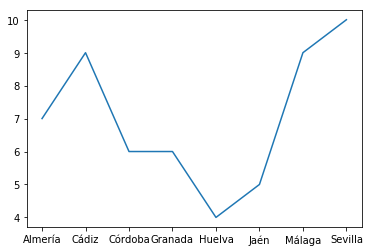

In [9]:
data = pd.read_csv('data.csv')
data.head()
plt.plot(data.groupby('Provincia').Provincia.count())
plt.show()

In [10]:
plt.savefig("figura.png")

<Figure size 432x288 with 0 Axes>

In [11]:
ls

CarlosBlanco11-Practica_api-d8d00c0/
data.csv
figura.png
M3.02Workflow.ipynb
M3.02Workflow_RazvanPascal_MiguelBlanco.ipynb
README.md
script.zip


# Publicación de los Datos

Utilizando la API de Zenodo

In [12]:
r = requests.get("https://zenodo.org/api/deposit/depositions")
r.status_code

401

In [13]:
r.json()

{'message': "The server could not verify that you are authorized to access the URL requested.  You either supplied the wrong credentials (e.g. a bad password), or your browser doesn't understand how to supply the credentials required.",
 'status': 401}

In [14]:
r = requests.get('https://zenodo.org/api/deposit/depositions',
                  params={'access_token': "ADAio1d2sgrL6mEJJd3S2iHpgS6JwRQrcia0uvf28Zcx8j5DHtqdDGtspZWf"

})

In [15]:
r.status_code
r.json()

[{'conceptdoi': '10.5281/zenodo.2541869',
  'conceptrecid': '2541869',
  'created': '2019-01-16T16:10:57.157478',
  'doi': '10.5281/zenodo.2541870',
  'doi_url': 'https://doi.org/10.5281/zenodo.2541870',
  'files': [{'checksum': '873b41f3b8e570bdcc7c01be07a607a7',
    'filename': 'CarlosBlanco11/Practica_api-v1.0.zip',
    'filesize': 665,
    'id': '1b170041-9e4c-423e-8506-60a1c882810a',
    'links': {'download': 'https://zenodo.org/api/files/21c97f2e-f588-4e56-96cf-8dc213e83ad8/CarlosBlanco11/Practica_api-v1.0.zip',
     'self': 'https://zenodo.org/api/deposit/depositions/2544894/files/1b170041-9e4c-423e-8506-60a1c882810a'}}],
  'id': 2541870,
  'links': {'badge': 'https://zenodo.org/badge/doi/10.5281/zenodo.2541870.svg',
   'bucket': 'https://zenodo.org/api/files/c2f5965a-6918-4294-a926-7016be843522',
   'conceptbadge': 'https://zenodo.org/badge/doi/10.5281/zenodo.2541869.svg',
   'conceptdoi': 'https://doi.org/10.5281/zenodo.2541869',
   'discard': 'https://zenodo.org/api/deposit/d

In [16]:
headers = {"Content-Type": "application/json"}
r = requests.post('https://zenodo.org/api/deposit/depositions',
                   params={'access_token': 'ADAio1d2sgrL6mEJJd3S2iHpgS6JwRQrcia0uvf28Zcx8j5DHtqdDGtspZWf'}, json={},
                   headers=headers)
r.status_code
r.json()

{'conceptrecid': '2545707',
 'created': '2019-01-21T16:49:25.939293+00:00',
 'files': [],
 'id': 2545708,
 'links': {'bucket': 'https://zenodo.org/api/files/bc768014-45b2-4ca1-b2d8-324ccf79411c',
  'discard': 'https://zenodo.org/api/deposit/depositions/2545708/actions/discard',
  'edit': 'https://zenodo.org/api/deposit/depositions/2545708/actions/edit',
  'files': 'https://zenodo.org/api/deposit/depositions/2545708/files',
  'html': 'https://zenodo.org/deposit/2545708',
  'latest_draft': 'https://zenodo.org/api/deposit/depositions/2545708',
  'latest_draft_html': 'https://zenodo.org/deposit/depositions/2545708',
  'publish': 'https://zenodo.org/api/deposit/depositions/2545708/actions/publish',
  'self': 'https://zenodo.org/api/deposit/depositions/2545708'},
 'metadata': {'prereserve_doi': {'doi': '10.5281/zenodo.2545708',
   'recid': 2545708}},
 'modified': '2019-01-21T16:49:25.939311+00:00',
 'owner': 58446,
 'record_id': 2545708,
 'state': 'unsubmitted',
 'submitted': False,
 'title'

In [18]:
deposition_id = r.json()['id']
data = {'filename': 'figura.png'}
files = {'file': open('figura.png', 'rb')}
r = requests.post('https://zenodo.org/api/deposit/depositions/%s/files' % deposition_id,
                   params={'access_token': 'ADAio1d2sgrL6mEJJd3S2iHpgS6JwRQrcia0uvf28Zcx8j5DHtqdDGtspZWf'}, data=data,
                   files=files)
r.status_code
r.json()

{'checksum': 'a6766b6cc03657706cfa688fab2916bf',
 'filename': 'figura.png',
 'filesize': 1274,
 'id': '607fb96f-d977-4378-92e5-a3a8f40ed7f6',
 'links': {'download': 'https://zenodo.org/api/files/bc768014-45b2-4ca1-b2d8-324ccf79411c/figura.png',
  'self': 'https://zenodo.org/api/deposit/depositions/2545708/files/607fb96f-d977-4378-92e5-a3a8f40ed7f6'}}

Se ha utilizado en token de upload, no el de publish:

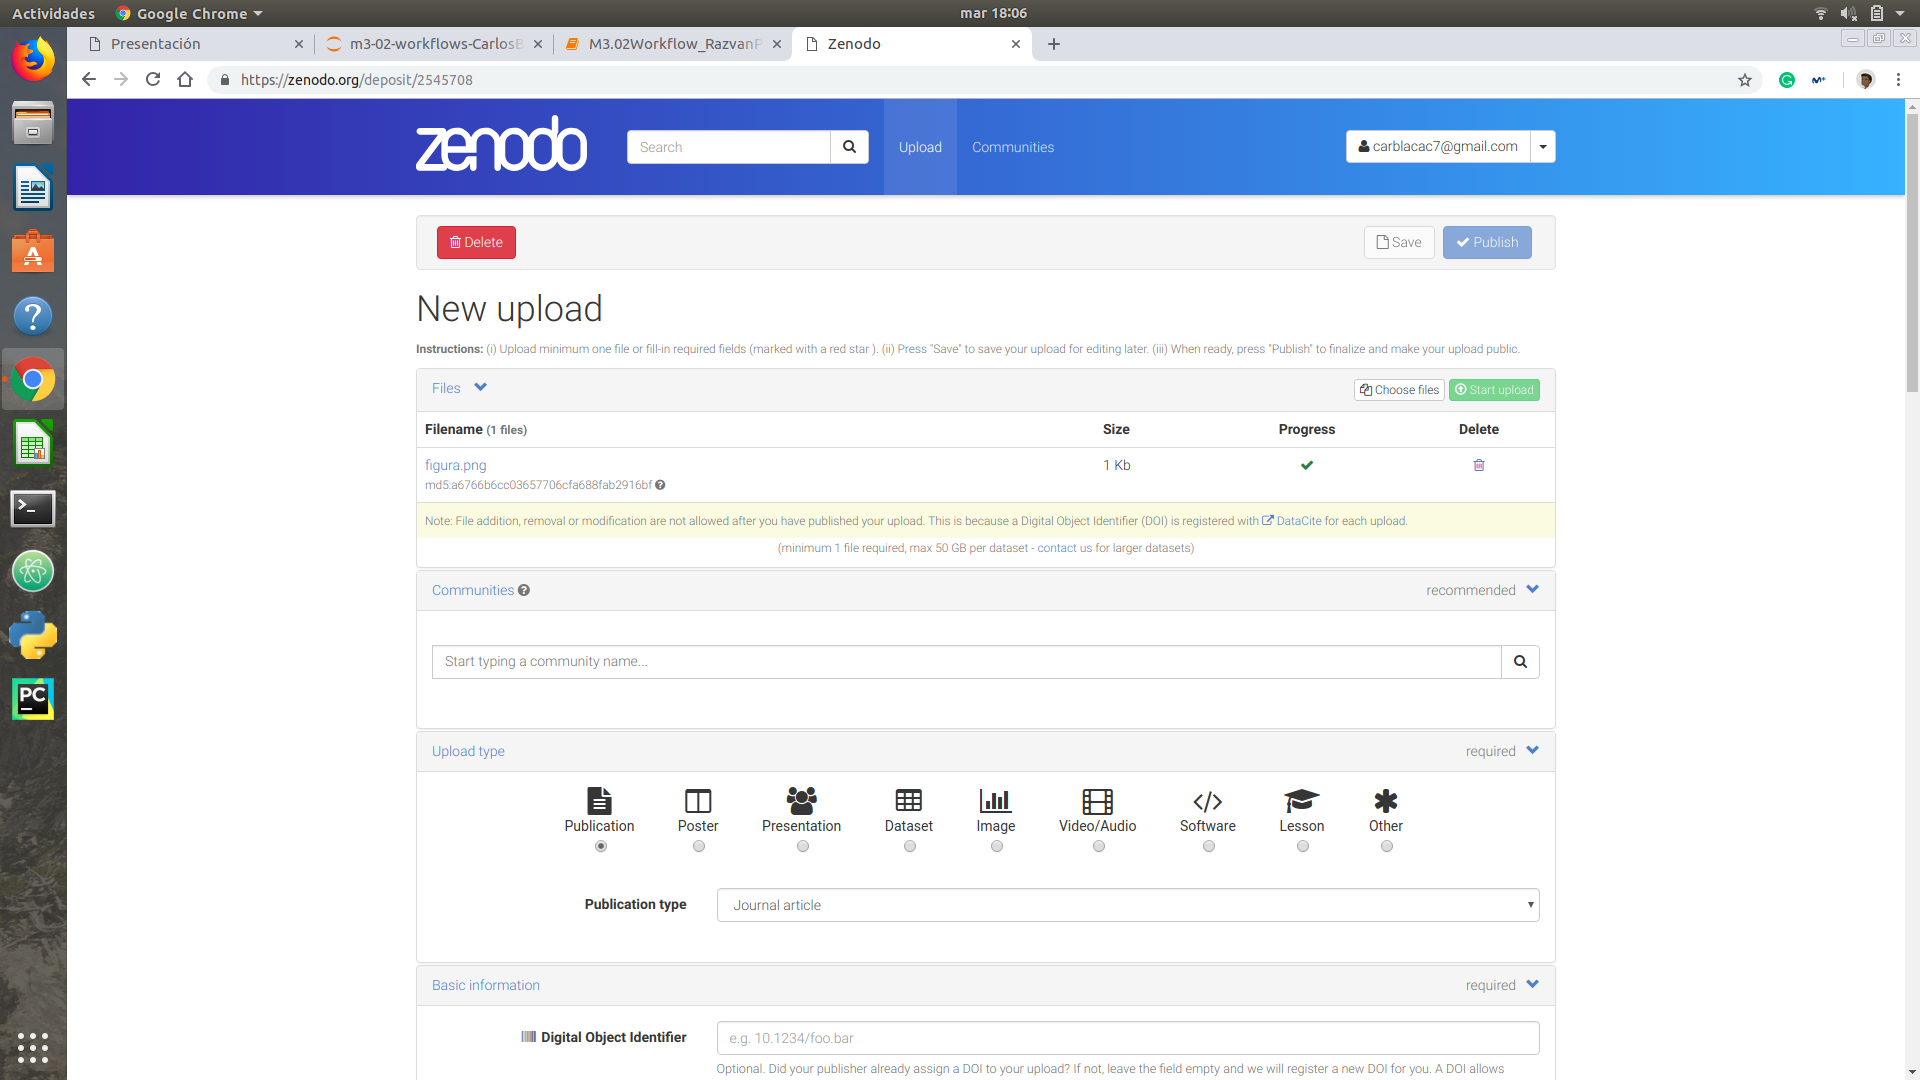

In [3]:
from IPython.display import Image
Image('/home/jovyan/m3-02-workflows-CarlosBlanco11/Imagen.png')

¿Puedes replicar ese workflow en un sólo bloque con otros datos?